### hyperparmeter setting, load data

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

seq_length = 7 # 7일간의 data로 예측
data_dim = 5 # 시가, 고가, 저가, 거래량, 종가
hidden_dim = 10
output_dim = 1 # 최종 출력 : 8일차의 종가
learning_rate = 0.01
epochs = 500

xy = np.loadtxt("daily_data.csv", delimiter = ",")
xy = xy[::-1] # 최근 정보가 위에 있으므로 reverse

### make train, test set
- 총 데이터의 70%만 train set으로 사용

In [2]:
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

### scaling

In [3]:
temp_set = train_set - np.min(train_set, 0)
train_set = temp_set / (np.max(train_set, 0) - np.min(train_set, 0) + 1e-7)

temp_set = test_set - np.min(test_set, 0)
test_set = temp_set / (np.max(test_set, 0) - np.min(test_set, 0) + 1e-7)

### make dataset
- train_set에 있는 7개의 연속된 정보가 하나의 input이 되고, label은 다음 정보의 close가된다.

In [4]:
trainX = []
trainY = []
testX = []
testY = []
for i in range(0, len(train_set) - seq_length):
    _x = train_set[i : i + seq_length, :] # 7일간(i : i +seq)의 모든 정보(:)
    _y = train_set[i + seq_length, [-1]] # 8일째(i +seq)의 close([-1])만
    trainX.append(_x)
    trainY.append(_y)

for i in range(0, len(test_set) - seq_length):
    _x = test_set[i : i + seq_length, :] # 7일간(i : i +seq)의 모든 정보(:)
    _y = test_set[i + seq_length, [-1]] # 8일째(i +seq)의 close([-1])만
    testX.append(_x)
    testY.append(_y)

### To tensor

In [5]:
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

### network
- 

In [6]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

### loss, optimizer

In [7]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

### training

In [8]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(f"{epoch}/{epochs}  loss = {loss.item()}")

0/500  loss = 0.5166828036308289
1/500  loss = 0.4170107841491699
2/500  loss = 0.32380858063697815
3/500  loss = 0.23704306781291962
4/500  loss = 0.1593581587076187
5/500  loss = 0.09427493065595627
6/500  loss = 0.04642519727349281
7/500  loss = 0.020910849794745445
8/500  loss = 0.020904872566461563
9/500  loss = 0.041304007172584534
10/500  loss = 0.06378450244665146
11/500  loss = 0.07313631474971771
12/500  loss = 0.06809797883033752
13/500  loss = 0.05432381108403206
14/500  loss = 0.03832040727138519
15/500  loss = 0.025202041491866112
16/500  loss = 0.017826352268457413
17/500  loss = 0.016330130398273468
18/500  loss = 0.018769631162285805
19/500  loss = 0.02243954874575138
20/500  loss = 0.02518077939748764
21/500  loss = 0.025998838245868683
22/500  loss = 0.024831319227814674
23/500  loss = 0.022139305248856544
24/500  loss = 0.018610529601573944
25/500  loss = 0.01495854277163744
26/500  loss = 0.01178054977208376
27/500  loss = 0.0094615388661623
28/500  loss = 0.008130

225/500  loss = 0.0017820302164182067
226/500  loss = 0.0017810825956985354
227/500  loss = 0.0017801363719627261
228/500  loss = 0.0017791904974728823
229/500  loss = 0.0017782460199669003
230/500  loss = 0.0017773025901988149
231/500  loss = 0.0017763598589226604
232/500  loss = 0.0017754185246303678
233/500  loss = 0.0017744775395840406
234/500  loss = 0.0017735377186909318
235/500  loss = 0.0017725987127050757
236/500  loss = 0.0017716605216264725
237/500  loss = 0.0017707229126244783
238/500  loss = 0.001769786817021668
239/500  loss = 0.0017688511870801449
240/500  loss = 0.0017679162556305528
241/500  loss = 0.0017669821390882134
242/500  loss = 0.0017660493031144142
243/500  loss = 0.0017651166999712586
244/500  loss = 0.0017641851445659995
245/500  loss = 0.0017632541712373495
246/500  loss = 0.001762324245646596
247/500  loss = 0.001761394552886486
248/500  loss = 0.0017604660242795944
249/500  loss = 0.0017595383105799556
250/500  loss = 0.0017586105968803167
251/500  loss =

464/500  loss = 0.0015664015663787723
465/500  loss = 0.001565492246299982
466/500  loss = 0.0015645825769752264
467/500  loss = 0.0015636729076504707
468/500  loss = 0.001562763354741037
469/500  loss = 0.0015618536854162812
470/500  loss = 0.0015609440160915256
471/500  loss = 0.0015600343467667699
472/500  loss = 0.0015591252595186234
473/500  loss = 0.0015582158230245113
474/500  loss = 0.001557306619361043
475/500  loss = 0.0015563974156975746
476/500  loss = 0.001555488328449428
477/500  loss = 0.0015545799396932125
478/500  loss = 0.0015536712016910315
479/500  loss = 0.0015527629293501377
480/500  loss = 0.0015518557047471404
481/500  loss = 0.0015509473159909248
482/500  loss = 0.0015500403242185712
483/500  loss = 0.0015491333324462175
484/500  loss = 0.001548226922750473
485/500  loss = 0.0015473206294700503
486/500  loss = 0.0015464150346815586
487/500  loss = 0.0015455102548003197
488/500  loss = 0.001544605358503759
489/500  loss = 0.0015437008114531636
490/500  loss = 0.

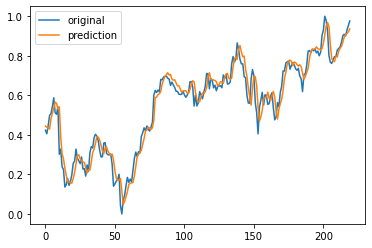

In [9]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()